In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial analysis and visualization
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Statistical analysis
from scipy.stats import pearsonr, spearmanr, ttest_ind

# Warnings handling
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Project_df.csv')

In [3]:
print(f"Number of rows: {df.shape[0]}")
df

Number of rows: 31358


,FIPS,NAMELSAD,State_x,Population,State_y,COUNTY ID,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE,quadkey,avg_d_kbps,...,year,nraster,rad_mean,rad_min,rad_max,rad_median,rad_sd,rad_q25,rad_q75,rad_IQR
0,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103132,6042,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
1,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103231,9455,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
2,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103330,99985,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
3,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103333,20131,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
4,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302120321,18967,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31353,13303,Washington,Georgia,20386,ID,16087,0.8907,0.19,212330120022100,10010,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0
31354,12133,Washington,Florida,24880,ID,16087,0.8907,0.19,212330120022100,10010,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0
31355,8121,Washington,Colorado,4909,ID,16087,0.8907,0.19,212330120022100,10010,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0
31356,5143,Washington,Arkansas,236961,ID,16087,0.8907,0.19,212330120022100,10010,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0


---
# Data Cleaning

In [8]:

# Filter the data to include only rows where 'State_x' is Idaho in broadband data
idaho_df = df[
    (df['State_x'].str.strip().str.lower() == 'idaho') &
    (df['state'].str.strip().str.lower() == 'idaho')
]

# Display the number of rows after filtering
print(f"Number of rows for Idaho: {idaho_df.shape[0]}")

# Reset the index
idaho_df.reset_index(drop=True, inplace=True)

# Display  Idaho data
idaho_df

Number of rows for Idaho: 10977


,FIPS,NAMELSAD,State_x,Population,State_y,COUNTY ID,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE,quadkey,avg_d_kbps,...,year,nraster,rad_mean,rad_min,rad_max,rad_median,rad_sd,rad_q25,rad_q75,rad_IQR
0,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103132,6042,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
1,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103231,9455,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
2,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103330,99985,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
3,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302103333,20131,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
4,16001,Ada,Idaho,469966,ID,16001,0.9914,0.86,212330302120321,18967,...,2020,17630,3.807345,0.0,176.500000,0.0,10.801604,0.0,1.3,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,16087,Washington,Idaho,10161,ID,16087,0.8907,0.19,212330033211011,6936,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0
10973,16087,Washington,Idaho,10161,ID,16087,0.8907,0.19,212330033302013,17611,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0
10974,16087,Washington,Idaho,10161,ID,16087,0.8907,0.19,212330033302220,10042,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0
10975,16087,Washington,Idaho,10161,ID,16087,0.8907,0.19,212330033302222,9919,...,2020,24899,0.022664,0.0,27.700001,0.0,0.445674,0.0,0.0,0.0


In [10]:
# Know the structure of the dataset
idaho_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977 entries, 0 to 10976
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FIPS                            10977 non-null  int64  
 1   NAMELSAD                        10977 non-null  object 
 2   State_x                         10977 non-null  object 
 3   Population                      10977 non-null  int64  
 4   State_y                         10977 non-null  object 
 5   COUNTY ID                       10977 non-null  int64  
 6   BROADBAND AVAILABILITY PER FCC  10977 non-null  float64
 7   BROADBAND USAGE                 10977 non-null  float64
 8   quadkey                         10977 non-null  int64  
 9   avg_d_kbps                      10977 non-null  int64  
 10  avg_u_kbps                      10977 non-null  int64  
 11  avg_lat_ms                      10977 non-null  int64  
 12  tests                           

In [12]:
# Drop the 'METDIVFP'column from the DataFrame
# Because it does not any values  ,
# my project is focused on Idaho, and all rows already pertain to the same region.
idaho_df = idaho_df.drop(columns=['METDIVFP','LSAD', 'CLASSFP', 'MTFCC', 'FUNCSTAT'])

#  LSAD', 'CLASSFP', 'MTFCC', 'FUNCSTAT' These columns likely pertain to geographical classifications that do not vary within Idaho, making them redundant for analysis.
# By dropping these columns, I'll simplify the dataset and make it more focused on the data that matters to my project,
# such as broadband and radiance information.

In [14]:
# The STATEFP column represents the FIPS code for the state , all rows are from the state of Idaho .SO I WILL CHANGE IT
idaho_df = idaho_df.drop(columns=['STATEFP'])

In [16]:
# Drop columns with all 0.0 or missing values that are not helpful
idaho_df = idaho_df.drop(columns=[ 'rad_q25', 'rad_q75', 'rad_IQR', 'rad_median'])

In [22]:
# Display column names
print("Columns in the dataset:", idaho_df.columns.tolist())

# Summary statistics of numerical columns
idaho_df.describe()

Columns in the dataset: ['FIPS', 'NAMELSAD', 'State_x', 'Population', 'State_y', 'COUNTY ID', 'BROADBAND AVAILABILITY PER FCC', 'BROADBAND USAGE', 'quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices', 'geometry', 'index_right', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'CSAFP', 'CBSAFP', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'avg_d_mbps', 'avg_u_mbps', 'county_ID', 'state', 'year', 'nraster', 'rad_mean', 'rad_min', 'rad_max', 'rad_sd']


,FIPS,Population,COUNTY ID,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,...,INTPTLON,avg_d_mbps,avg_u_mbps,county_ID,year,nraster,rad_mean,rad_min,rad_max,rad_sd
count,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,1.097700e+04,10977.000000,10977.000000,10977.000000,10977.000000,...,10977.000000,10977.000000,10977.000000,10977.000000,10977.0,10977.000000,10977.000000,10977.0,10977.000000,10977.000000
mean,16033.327230,153707.695545,16033.327230,0.945251,0.573099,2.125512e+14,57155.642616,15442.156418,55.789651,8.638517,...,-114.947585,57.155643,15.442156,16033.327230,2020.0,25465.942881,1.240195,0.0,98.692885,4.389619
std,26.376867,165187.637328,26.376867,0.094456,0.247086,3.901803e+11,64537.250228,30533.972456,144.125344,15.113479,...,2.015088,64.537250,30.533972,26.376867,0.0,19999.587225,1.495134,0.0,63.705808,3.877120
min,16001.000000,852.000000,16001.000000,0.294700,0.004000,2.121323e+14,17.000000,4.000000,1.000000,1.000000,...,-116.797792,0.017000,0.004000,16001.000000,2020.0,6839.000000,0.002062,0.0,6.000000,0.089834
25%,16011.000000,23864.000000,16011.000000,0.949800,0.338000,2.123123e+14,10976.000000,2570.000000,17.000000,1.000000,...,-116.695922,10.976000,2.570000,16011.000000,2020.0,17630.000000,0.093062,0.0,46.900002,1.097131
50%,16027.000000,86081.000000,16027.000000,0.987900,0.586000,2.123303e+14,30851.000000,6580.000000,25.000000,3.000000,...,-116.244376,30.851000,6.580000,16027.000000,2020.0,19003.000000,0.474149,0.0,93.500000,3.084078
75%,16055.000000,223499.000000,16055.000000,0.991400,0.770000,2.132200e+14,86042.000000,13604.000000,40.000000,9.000000,...,-112.399206,86.042000,13.604000,16055.000000,2020.0,31366.000000,3.003918,0.0,176.500000,8.656483
max,16087.000000,469966.000000,16087.000000,0.999000,0.870000,2.132222e+14,658488.000000,446544.000000,4232.000000,459.000000,...,-111.211765,658.488000,446.544000,16087.000000,2020.0,147020.000000,3.807345,0.0,195.399994,10.801604


---
# Identify Relevant Columns:
Geographic Identifiers: FIPS, NAMELSAD, State_x, COUNTY ID, quadkey, geometry.

Internet Metrics: avg_d_kbps, avg_u_kbps, avg_lat_ms, tests, devices, BROADBAND AVAILABILITY PER FCC, BROADBAND USAGE.

Radiance Metrics: rad_mean, rad_min, rad_max, rad_median, rad_sd, rad_q25, rad_q75, rad_IQR.

Population and Demographics: Population, Year.

In [25]:
# Rdiance Matrics:
# represent statistical measures of light intensity (radiance) captured from satellite imagery,
# typically at night. These metrics are often used to analyze lighting levels in different geographic regions,
# which can help identify urban and rural areas based on their lighting characteristics.

In [27]:
# 1: rad_mean (Mean Radiance):
#The average radiance value across a region, Provides a general indication of how bright a region is on average.

# 2:rad_min (Minimum Radiance):
#The lowest radiance value in the region. Helps identify the darkest spots, possibly indicating areas with no artificial lighting.

# 3:rad_max (Maximum Radiance):
#The highest radiance value in the region, Points to the brightest areas, such as city centers or industrial zones.

# 4:rad_median (Median Radiance):
# The middle value of radiance when all values are sorted , Less affected by extreme values compared to the mean, offering a more robust measure of central tendency.

# 5:rad_sd (Standard Deviation of Radiance):
# Measures the variability or spread of radiance values.A high standard deviation indicates diverse lighting levels (e.g., mix of bright city lights and dark rural areas).

# 6:rad_q25 (25th Percentile, or Lower Quartile):
#The value below which 25% of the radiance data falls. Useful for identifying the darker areas within a region.

# 7:rad_q75 (75th Percentile, or Upper Quartile):
#The value below which 75% of the radiance data falls. Captures the brighter areas while ignoring extreme brightness outliers.

# 8:rad_IQR (Interquartile Range):
#The difference between rad_q75 and rad_q25. Measures the range of radiance values in the middle 50% of the data, providing insights into the spread of typical lighting levels.


In [29]:
#Explanation of Each Internet Metric
# 1:avg_d_kbps (Average Download Speed in kbps):
#This represents the average download speed measured in kilobits per second (kbps).
#Download speed refers to how quickly data can be transferred from the internet to a user’s device.
#Higher values indicate faster download speeds, which are important for tasks like streaming, browsing, and downloading files.

# 2:avg_u_kbps (Average Upload Speed in kbps):
#This represents the average upload speed measured in kilobits per second (kbps).
#Upload speed refers to how quickly data can be sent from a user’s device to the internet.
#Higher values are essential for activities like video conferencing, uploading files, or hosting servers.

# 3:avg_lat_ms (Average Latency in ms):
#Latency is the time it takes for data to travel from the source to the destination and back, measured in milliseconds (ms).
#Low latency (e.g., below 100 ms) is crucial for real-time activities like gaming, video conferencing, or VoIP calls. High latency can result in noticeable delays and poor performance.

# 4:tests (Number of Speed Tests Conducted):
#This represents how many internet speed tests have been conducted in the region.
#A higher number of tests indicates more frequent measurements, which may lead to more reliable data for analyzing internet performance.

# 5:devices (Number of Devices):
#This represents the number of devices that have conducted internet speed tests in the region.
#This metric helps understand the diversity of devices contributing to the speed test data (e.g., smartphones, computers, etc.).

# 6:BROADBAND AVAILABILITY PER FCC:
#This is a measure of broadband availability in the region according to the Federal Communications Commission (FCC).
#It indicates what percentage of the population or geographical area has access to broadband internet (usually defined as speeds greater than 25 Mbps download / 3 Mbps upload).
#This metric is important for identifying digital divide issues, especially in rural or underserved areas.

# 7:BROADBAND USAGE:
#This represents how much broadband is being used in the region. It may be measured in terms of average consumption, the number of users, or total data usage.
#It helps understand the demand for internet services and could reflect the usage intensity in both urban and rural areas.

In [31]:
# We will Count the missing values per column
print("Missing values per column:")
print(idaho_df.isnull().sum())


Missing values per column:
FIPS                                 0
NAMELSAD                             0
State_x                              0
Population                           0
State_y                              0
COUNTY ID                            0
BROADBAND AVAILABILITY PER FCC       0
BROADBAND USAGE                      0
quadkey                              0
avg_d_kbps                           0
avg_u_kbps                           0
avg_lat_ms                           0
tests                                0
devices                              0
geometry                             0
index_right                          0
COUNTYFP                             0
COUNTYNS                             0
GEOID                                0
NAME                                 0
CSAFP                             3788
CBSAFP                            1044
ALAND                                0
AWATER                               0
INTPTLAT                             

In [33]:
# Fill missing values with the mean of each column
idaho_df['CSAFP'] = idaho_df['CSAFP'].fillna(idaho_df['CSAFP'].mean())
idaho_df['CBSAFP'] = idaho_df['CBSAFP'].fillna(idaho_df['CBSAFP'].mean())
print(idaho_df.isnull().sum())

FIPS                              0
NAMELSAD                          0
State_x                           0
Population                        0
State_y                           0
COUNTY ID                         0
BROADBAND AVAILABILITY PER FCC    0
BROADBAND USAGE                   0
quadkey                           0
avg_d_kbps                        0
avg_u_kbps                        0
avg_lat_ms                        0
tests                             0
devices                           0
geometry                          0
index_right                       0
COUNTYFP                          0
COUNTYNS                          0
GEOID                             0
NAME                              0
CSAFP                             0
CBSAFP                            0
ALAND                             0
AWATER                            0
INTPTLAT                          0
INTPTLON                          0
avg_d_mbps                        0
avg_u_mbps                  

In [35]:
# Find columns with identical values
identical_columns = []
for col1 in idaho_df.columns:
    for col2 in idaho_df.columns:
        if col1 != col2 and col1 not in identical_columns:
            if idaho_df[col1].equals(idaho_df[col2]):
                identical_columns.append((col1, col2))

In [37]:
print("Identical columns:", identical_columns)

Identical columns: [('FIPS', 'COUNTY ID'), ('FIPS', 'GEOID'), ('FIPS', 'county_ID'), ('NAMELSAD', 'NAME'), ('State_x', 'state'), ('COUNTY ID', 'FIPS'), ('COUNTY ID', 'GEOID'), ('COUNTY ID', 'county_ID'), ('GEOID', 'FIPS'), ('GEOID', 'COUNTY ID'), ('GEOID', 'county_ID'), ('NAME', 'NAMELSAD'), ('county_ID', 'FIPS'), ('county_ID', 'COUNTY ID'), ('county_ID', 'GEOID'), ('state', 'State_x')]


In [39]:
# dropping columns with identical values
idaho_df.drop(columns=['COUNTY ID', 'GEOID','county_ID','NAME','state','State_y'], inplace=True)


In [43]:
idaho_df

,FIPS,NAMELSAD,State_x,Population,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,...,INTPTLAT,INTPTLON,avg_d_mbps,avg_u_mbps,year,nraster,rad_mean,rad_min,rad_max,rad_sd
0,16001,Ada,Idaho,469966,0.9914,0.86,212330302103132,6042,694,63,...,43.451477,-116.244376,6.042,0.694,2020,17630,3.807345,0.0,176.500000,10.801604
1,16001,Ada,Idaho,469966,0.9914,0.86,212330302103231,9455,563,59,...,43.451477,-116.244376,9.455,0.563,2020,17630,3.807345,0.0,176.500000,10.801604
2,16001,Ada,Idaho,469966,0.9914,0.86,212330302103330,99985,110539,4,...,43.451477,-116.244376,99.985,110.539,2020,17630,3.807345,0.0,176.500000,10.801604
3,16001,Ada,Idaho,469966,0.9914,0.86,212330302103333,20131,30671,6,...,43.451477,-116.244376,20.131,30.671,2020,17630,3.807345,0.0,176.500000,10.801604
4,16001,Ada,Idaho,469966,0.9914,0.86,212330302120321,18967,4046,32,...,43.451477,-116.244376,18.967,4.046,2020,17630,3.807345,0.0,176.500000,10.801604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,16087,Washington,Idaho,10161,0.8907,0.19,212330033211011,6936,730,26,...,44.448223,-116.797792,6.936,0.730,2020,24899,0.022664,0.0,27.700001,0.445674
10973,16087,Washington,Idaho,10161,0.8907,0.19,212330033302013,17611,15459,30,...,44.448223,-116.797792,17.611,15.459,2020,24899,0.022664,0.0,27.700001,0.445674
10974,16087,Washington,Idaho,10161,0.8907,0.19,212330033302220,10042,1887,22,...,44.448223,-116.797792,10.042,1.887,2020,24899,0.022664,0.0,27.700001,0.445674
10975,16087,Washington,Idaho,10161,0.8907,0.19,212330033302222,9919,1917,19,...,44.448223,-116.797792,9.919,1.917,2020,24899,0.022664,0.0,27.700001,0.445674


In [45]:
idaho_df.rename(columns={'FIPS': 'Geographic_ID.', 'NAMELSAD': 'County_Name' ,'NAMELSAD': 'County_Name' }, inplace=True)


---
# Columns You Might Consider Dropping:
State_x: since i am  focusing on Idaho, it might be redundant.

quadkey: This seems like a geospatial identifier, but unless using it for spatial analysis, I might drop it.

geometry: If we don’t need to perform any spatial operations (e.g., mapping, spatial joins), this column can be dropped.

index_right, COUNTYFP, COUNTYNS, CSAFP, CBSAFP, ALAND, AWATER: These columns might be related to geographic or administrative classifications. If i am not using them in your analysis, we can drop them.

INTPTLAT, INTPTLON: These represent latitude and longitude. If your analysis doesn't involve mapping or precise geographic locations, i can drop them.

nraster: This seems like it could be related to the raster data, which might not be necessary for my broadband and radiance analysis.

year: If you're focusing on specific years or filtering by time, I might keep this. Otherwise, it might be redundant. (2020)


In [48]:
# Drop columns that are not necessary for your analysis
#idaho_df.drop(columns=['State_x', 'quadkey', 'geometry', 'index_right', 'COUNTYFP', 'COUNTYNS',
                #'CSAFP', 'CBSAFP', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'nraster'], inplace=True)


---
# Columns Important for Analysis:
Geographic_ID.: Represents the unique geographic identifier for counties.

County_Name: will likely need this to identify counties.

Population: This is important for your analysis of rural areas and broadband usage.

BROADBAND AVAILABILITY PER FCC and BROADBAND USAGE: These are crucial for analyzing broadband performance.

avg_d_kbps, avg_u_kbps, avg_lat_ms, tests, devices: These metrics are essential for internet performance analysis.

Radiance columns: Columns like rad_mean, rad_min, rad_max, rad_median, rad_sd, rad_q25, rad_q75, rad_IQR are essential for analyzing radiance data and correlating with internet performance & broadband performance.

In [51]:
idaho_df.to_csv('cleaned_dataset.csv', index=False)

---
# 1-internet performance metrics in rural regions

In [22]:
# her i will try to numbers to find a Threshold using Clustering
from sklearn.cluster import KMeans

# Reshape data for clustering
rad_mean_values = idaho_df['rad_mean'].values.reshape(-1, 1)

# Apply K-means clustering with 2 clusters (rural vs. urban)
kmeans = KMeans(n_clusters=2, random_state=42)
idaho_df['Cluster'] = kmeans.fit_predict(rad_mean_values)

# Map clusters to labels
cluster_map = {0: 'Rural', 1: 'Urban'}  # Adjust based on cluster center values
idaho_df['Region_Type'] = idaho_df['Cluster'].map(cluster_map)

# Check cluster center values
kmeans.cluster_centers_


array([[0.30802824],
       [3.51869651]])

In [23]:
# Define a threshold for rural classification based on radiance mean
# A threshold between the two cluster centers
mid_point = (0.31 + 3.52) / 2  # Ensure the parentheses correctly encapsulate the sum

RADIANCE_THRESHOLD = mid_point  # Example threshold; adjust based on domain knowledge

# Add a new column to classify regions as rural or urban
idaho_df['Region_Type'] = idaho_df['rad_mean'].apply(lambda x: 'Rural' if x < RADIANCE_THRESHOLD else 'Urban')

# Check the distribution of rural vs. urban regions
region_distribution = idaho_df['Region_Type'].value_counts()

# Display the first few rows of the updated dataset and the distribution
idaho_df


,Geographic_ID.,County_Name,State_x,Population,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,...,avg_d_mbps,avg_u_mbps,year,nraster,rad_mean,rad_min,rad_max,rad_sd,Cluster,Region_Type
0,16001,Ada,Idaho,469966,0.9914,0.86,212330302103132,6042,694,63,...,6.042,0.694,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban
1,16001,Ada,Idaho,469966,0.9914,0.86,212330302103231,9455,563,59,...,9.455,0.563,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban
2,16001,Ada,Idaho,469966,0.9914,0.86,212330302103330,99985,110539,4,...,99.985,110.539,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban
3,16001,Ada,Idaho,469966,0.9914,0.86,212330302103333,20131,30671,6,...,20.131,30.671,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban
4,16001,Ada,Idaho,469966,0.9914,0.86,212330302120321,18967,4046,32,...,18.967,4.046,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,16087,Washington,Idaho,10161,0.8907,0.19,212330033211011,6936,730,26,...,6.936,0.730,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural
10973,16087,Washington,Idaho,10161,0.8907,0.19,212330033302013,17611,15459,30,...,17.611,15.459,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural
10974,16087,Washington,Idaho,10161,0.8907,0.19,212330033302220,10042,1887,22,...,10.042,1.887,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural
10975,16087,Washington,Idaho,10161,0.8907,0.19,212330033302222,9919,1917,19,...,9.919,1.917,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural


In [24]:
# Count the number of rural rows
rural_rows = idaho_df[idaho_df['Region_Type'] == 'Rural'].shape[0]

# Count the number of urban rows
urban_rows = idaho_df[idaho_df['Region_Type'] == 'Urban'].shape[0]
print(f'Number of rural rows: {rural_rows}')

print(f'Number of urban rows: {urban_rows}')


Number of rural rows: 7790
Number of urban rows: 3187


In [25]:
# Display column names
print("Columns in the dataset:", idaho_df.columns.tolist())

Columns in the dataset: ['Geographic_ID.', 'County_Name', 'State_x', 'Population', 'BROADBAND AVAILABILITY PER FCC', 'BROADBAND USAGE', 'quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices', 'geometry', 'index_right', 'COUNTYFP', 'COUNTYNS', 'CSAFP', 'CBSAFP', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'avg_d_mbps', 'avg_u_mbps', 'year', 'nraster', 'rad_mean', 'rad_min', 'rad_max', 'rad_sd', 'Cluster', 'Region_Type']


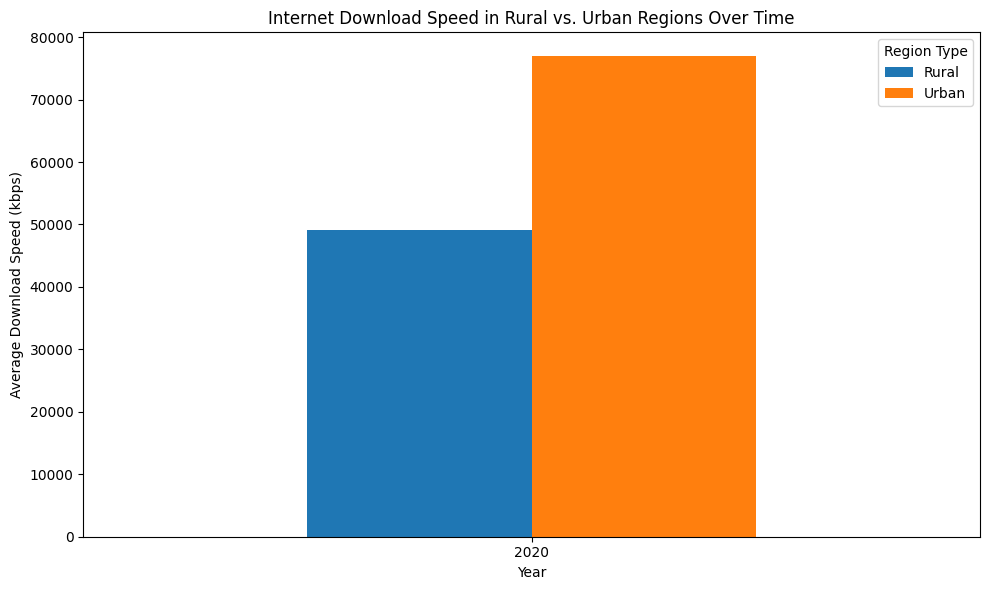

In [55]:
# Bar Chart: Show internet performance differences in rural regions over time.

import matplotlib.pyplot as plt

# Group data by year and region type, then calculate the mean download speed
performance_by_year = idaho_df.groupby(['year', 'Region_Type'])['avg_d_kbps'].mean().unstack()

# Create the bar chart
performance_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Internet Download Speed in Rural vs. Urban Regions Over Time')
plt.xlabel('Year')
plt.ylabel('Average Download Speed (kbps)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Region Type')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

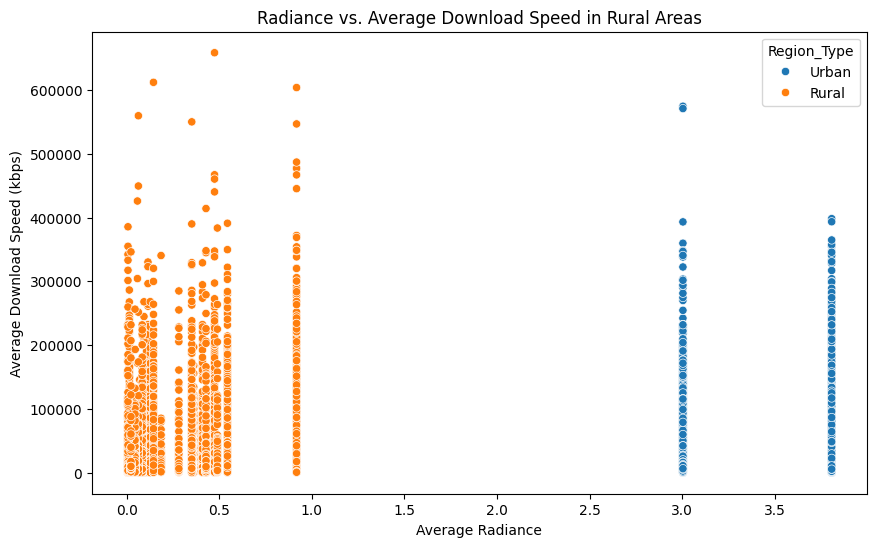

In [54]:
# Scatter Plot: Correlate radiance with internet performance in rural areas.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rad_mean', y='avg_d_kbps', data=idaho_df, hue='Region_Type')
plt.title('Radiance vs. Average Download Speed in Rural Areas')
plt.xlabel('Average Radiance')
plt.ylabel('Average Download Speed (kbps)')
plt.show()

---
# Why Normalize data
If you're just comparing internet performance (e.g., download/upload speeds, latency) between rural and urban regions, you can directly use the original data without normalizing it.

For Consistency: If you plan to use multiple variables (e.g., radiance, population, internet speeds) in a model (e.g., regression or machine learning), normalization can help ensure that all variables are on a similar scale, especially if they have very different ranges.

To Avoid Bias in Models: Some machine learning algorithms (e.g., k-nearest neighbors, logistic regression) can perform better when the input features are normalized because they rely on distances between points. This prevents features with larger ranges from dominating the model.


In [26]:
#Normalized Radiance= (Max Radiance−Min Radiance) /(Radiance Value−Min Radiance)
#Dividing the range (0 to 1) into three parts creates boundaries at:
#0 to 0.33: Low
#0.33 to 0.66: Medium
#0.66 to 1: High

In [27]:
# Normalize the 'rad_mean' column
min_rad = idaho_df['rad_mean'].min()
max_rad = idaho_df['rad_mean'].max()
idaho_df['normalized_rad'] = (idaho_df['rad_mean'] - min_rad) / (max_rad - min_rad)

# Categorize based on normalized radiance
bins = [0, 0.33, 0.66, 1]  # Low, Medium, High
labels = ['Low', 'Medium', 'High']
idaho_df['rad_category'] = pd.cut(idaho_df['normalized_rad'], bins=bins, labels=labels, include_lowest=True)

# Display a sample of the data
idaho_df


,Geographic_ID.,County_Name,State_x,Population,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,...,year,nraster,rad_mean,rad_min,rad_max,rad_sd,Cluster,Region_Type,normalized_rad,rad_category
0,16001,Ada,Idaho,469966,0.9914,0.86,212330302103132,6042,694,63,...,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban,1.000000,High
1,16001,Ada,Idaho,469966,0.9914,0.86,212330302103231,9455,563,59,...,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban,1.000000,High
2,16001,Ada,Idaho,469966,0.9914,0.86,212330302103330,99985,110539,4,...,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban,1.000000,High
3,16001,Ada,Idaho,469966,0.9914,0.86,212330302103333,20131,30671,6,...,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban,1.000000,High
4,16001,Ada,Idaho,469966,0.9914,0.86,212330302120321,18967,4046,32,...,2020,17630,3.807345,0.0,176.500000,10.801604,1,Urban,1.000000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,16087,Washington,Idaho,10161,0.8907,0.19,212330033211011,6936,730,26,...,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural,0.005414,Low
10973,16087,Washington,Idaho,10161,0.8907,0.19,212330033302013,17611,15459,30,...,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural,0.005414,Low
10974,16087,Washington,Idaho,10161,0.8907,0.19,212330033302220,10042,1887,22,...,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural,0.005414,Low
10975,16087,Washington,Idaho,10161,0.8907,0.19,212330033302222,9919,1917,19,...,2020,24899,0.022664,0.0,27.700001,0.445674,0,Rural,0.005414,Low


In [28]:
# Filter for rural regions (assuming 'Region_Type' defines rural regions)
rural_df = idaho_df[idaho_df['Region_Type'] == 'Rural']

# Display the filtered data
rural_df[['County_Name', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests']]

,County_Name,avg_d_mbps,avg_u_mbps,avg_lat_ms,tests
2042,Adams,5.379,2.180,64,4
2043,Adams,4.090,1.920,66,6
2044,Adams,3.648,1.840,55,2
2045,Adams,1.269,1.734,115,3
2046,Adams,1.149,2.091,81,1
...,...,...,...,...,...
10972,Washington,6.936,0.730,26,1
10973,Washington,17.611,15.459,30,1
10974,Washington,10.042,1.887,22,1
10975,Washington,9.919,1.917,19,1


In [29]:
# Count the number of rural rows
rural_rows = idaho_df[idaho_df['rad_category'] == 'Low'].shape[0]

# Count the number of urban rows
urban_rows = idaho_df[idaho_df['rad_category'] == 'High'].shape[0]

print(f'Number of rural rows: {rural_rows}')

print(f'Number of urban rows: {urban_rows}')


Number of rural rows: 7790
Number of urban rows: 3187


In [30]:
# Calculate mean internet performance metrics for each rural region
aggregated_metrics = rural_df.groupby(['County_Name'])[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests']].agg(['mean', 'median']).reset_index()

# Display the aggregated metrics
aggregated_metrics


County_Name avg_d_mbps          avg_u_mbps           avg_lat_ms         \
                     mean   median       mean   median        mean median   
0        Adams  10.657861   5.6470   3.539806   1.9160   71.527778   49.0   
1      Bannock  70.403288  45.0455  26.291724   9.2945   34.363415   18.0   
2    Bear Lake  21.510613  13.7870   8.016213   2.1310   73.240000   26.0   
3      Benewah  25.840606  15.7240   7.414121   2.4350  187.484848   26.0   
4      Bingham  44.086118  19.7770   9.034017   5.1560   34.832924   25.0   
5       Blaine  67.002479  47.7230  10.694015   9.5910   67.463320   46.0   
6        Boise  15.144836   9.0465   3.784259   1.9465   57.034483   39.0   
7       Bonner  26.150181  13.2670  11.274623   4.4560  159.195548   42.0   
8   Bonneville  72.801538  47.5080  23.293073   9.9130   28.942446   19.0   
9     Boundary  11.936261   7.2870   5.750061   1.5040  100.452174   27.0   
10       Butte  14.665727  15.7000   2.212455   1.0690   37.818182   22.0   
11       Camas   9.269333   4.5980   1.397500   1.3705  208.166667  125.5   
12     Caribou  29.488426  18.1390  13.798397   3.4510   61.573529   26.5   
13      Cassia  24.967770  12.9150   8.226655   3.2020   53.804255   27.0   
14       Clark  36.415500  36.4155   4.715500   4.7155   17.000000   17.0   
15  Clearwater  10.583106   8.2250   4.827809   2.0000  152.617021   63.0   
16      Custer  13.879083  14.1955   2.128250   0.9035   56.708333   40.0   
17      Elmore  30.891810  22.1440   6.774022   4.4790   98.255474   57.0   
18    Franklin  27.192667  17.6310   7.155488   3.6670   68.382114   24.0   
19     Fremont  20.372796  12.7365   5.778471   3.4885   47.704167   24.0   
20         Gem  36.234862  17.8525   9.488121   3.5980   43.344828   25.0   
21     Gooding  23.498456  11.6675   5.298721   2.0065   69.911765   34.5   
22       Idaho  18.945863  17.2400   7.209040   5.1030   89.959677   31.0   
23   Jefferson  39.915040  21.8260   8.703068   5.6290   39.716923   23.0   
24      Jerome  44.278396  21.5090   6.647207   3.0560   48.855856   25.0   
25    Kootenai  85.025576  66.2670  11.311057   9.8835   80.752517   30.0   
26       Latah  47.927644  11.7450   6.961567   4.1130   87.823755   39.0   
27       Lemhi  17.858250  14.7505   3.362100   1.7330  183.600000   70.0   
28       Lewis  17.675771  15.0680   4.679629   3.3130   57.828571   28.0   
29     Lincoln  18.717357   8.7225   3.516929   2.0125   62.714286   42.0   
30     Madison  32.018462  20.4710  15.156681   6.9380   37.986111   21.0   
31    Minidoka  29.650802   9.6320   8.773840   2.1650   41.347594   24.0   
32   Nez Perce  57.621943  37.8630  10.831892   7.6500   72.259434   42.0   
33      Oneida  39.838961  36.7970  38.350737  36.7165   12.921053    7.0   
34      Owyhee  42.731736   9.4920   5.305912   2.2730   51.153846   31.0   
35     Payette  55.734740  18.5360   8.329195   4.2260   43.528455   25.0   
36       Power  49.699422  16.8800  30.684062   6.3175   24.406250   21.5   
37    Shoshone  17.745798  16.3960   3.785121   1.8550  110.020202   65.0   
38       Teton  26.861457  18.9750   8.810646   4.1230   53.034286   17.0   
39  Twin Falls  70.867396  52.8720  16.012411   8.6450   31.882883   22.0   
40      Valley  37.330114  14.9530   6.254246   3.1440   60.360000   32.0   
41  Washington  59.002758  17.6110   7.476485   4.0740   31.454545   26.0   

        tests         
         mean median  
0    3.583333    2.0  
1   10.673171    4.0  
2    4.373333    2.0  
3    5.545455    3.0  
4    5.891892    2.0  
5    6.166023    3.0  
6    5.362069    2.0  
7    6.623211    2.0  
8    9.974101    5.0  
9    3.434783    1.0  
10   5.818182    3.0  
11  10.666667    1.0  
12   7.926471    2.0  
13   5.357447    2.0  
14   1.000000    1.0  
15   3.617021    1.0  
16   2.541667    1.5  
17   9.467153    3.0  
18   5.170732    2.0  
19   4.350000    2.0  
20   5.163793    2.0  
21   3.661765    1.0  
22   4.895161    2.0  
23   5.556923    2.0  
24   4.828829   

In [31]:
#The reduction in rows from 7,790 to 41
#Why Does This Happen?
#groupby Behavior:
# The groupby operation aggregates rows that share the same values in the grouping columns.
# In my case, the dataset is grouped by the combination of County_Name.
# If there are only 126 unique combinations of these columns in the dataset, the result will have 126 rows.

---
# Analyze trends in internet performance over time specifically for rural areas.


In [32]:
# according 'year' column
temporal_analysis = rural_df.groupby('year').agg({
    'avg_d_mbps': 'mean',
    'avg_u_mbps': 'mean',
    'avg_lat_ms': 'mean',
}).reset_index()

print(temporal_analysis)


   year  avg_d_mbps  avg_u_mbps  avg_lat_ms
0  2020   49.069557   12.034142   65.821823


---
# Statistical Analysis

In [33]:
# Assuming 'rad_mean' is the column for radiance values
correlation = rural_df[['rad_mean', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms']].corr()
print(correlation)

# Hypothesis testing: Radiance vs Download Speed
from scipy.stats import pearsonr

r, p_value = pearsonr(rural_df['rad_mean'], rural_df['avg_d_mbps'])
print(f"Correlation: {r}, P-value: {p_value}")


            rad_mean  avg_d_mbps  avg_u_mbps  avg_lat_ms
rad_mean    1.000000    0.315536    0.089771   -0.021972
avg_d_mbps  0.315536    1.000000    0.440583   -0.122450
avg_u_mbps  0.089771    0.440583    1.000000   -0.113461
avg_lat_ms -0.021972   -0.122450   -0.113461    1.000000
Correlation: 0.3155361198650521, P-value: 1.2527282831362542e-179


---
#  Identify Best/Worst Performing Rural Regions

In [34]:
# Calculate mean internet performance metrics for each rural region
mean_metrics = rural_df.groupby(['County_Name'])[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests']].mean().reset_index()

# Best-performing regions
best_regions = mean_metrics.nlargest(5, 'avg_d_mbps')
print("\nBest-performing regions:")
print(best_regions)

# Worst-performing regions
worst_regions = mean_metrics.nsmallest(5, 'avg_d_mbps')
print("\nWorst-performing regions:")
print(worst_regions)



Best-performing regions:
   County_Name  avg_d_mbps  avg_u_mbps  avg_lat_ms      tests
25    Kootenai   85.025576   11.311057   80.752517   9.144295
8   Bonneville   72.801538   23.293073   28.942446   9.974101
39  Twin Falls   70.867396   16.012411   31.882883   7.927928
1      Bannock   70.403288   26.291724   34.363415  10.673171
5       Blaine   67.002479   10.694015   67.463320   6.166023

Worst-performing regions:
   County_Name  avg_d_mbps  avg_u_mbps  avg_lat_ms      tests
11       Camas    9.269333    1.397500  208.166667  10.666667
15  Clearwater   10.583106    4.827809  152.617021   3.617021
0        Adams   10.657861    3.539806   71.527778   3.583333
9     Boundary   11.936261    5.750061  100.452174   3.434783
16      Custer   13.879083    2.128250   56.708333   2.541667


---
# 2- Broadband Availability and internet performance

---
# Explain
Correlation coefficient (r): A positive correlation (r > 0) indicates that as broadband availability increases, internet speeds (download/upload) improve.

A negative correlation (r < 0) suggests that better broadband availability leads to lower latency.

P-value: If the p-value is less than 0.05, the correlation is statistically significant.


In [37]:
# Calculate correlations
correlation = rural_df[['BROADBAND AVAILABILITY PER FCC', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms']].corr()

# Round the correlation values for better readability
correlation = correlation.round(2)

# Apply style to make the matrix more readable and color-coded
styled_correlation = correlation.style.background_gradient(cmap='coolwarm').format("{:.2f}")

# Display the styled correlation matrix
styled_correlation


,BROADBAND AVAILABILITY PER FCC,avg_d_mbps,avg_u_mbps,avg_lat_ms
BROADBAND AVAILABILITY PER FCC,1.00,0.15,0.09,-0.03
avg_d_mbps,0.15,1.00,0.44,-0.12
avg_u_mbps,0.09,0.44,1.00,-0.11
avg_lat_ms,-0.03,-0.12,-0.11,1.00


---
# Statistical Analysis

In [38]:
from scipy.stats import pearsonr

# Pearson correlation for Broadband Availability vs Download Speed
r, p_value = pearsonr(rural_df['BROADBAND AVAILABILITY PER FCC'], rural_df['avg_d_mbps'])
print(f"Correlation between Broadband Availability and Download Speed: {r}, P-value: {p_value}")


Correlation between Broadband Availability and Download Speed: 0.15072530525658037, P-value: 8.183654477616542e-41


In [39]:
# Pearson correlation for Broadband Availability vs Upload Speed
r, p_value = pearsonr(rural_df['BROADBAND AVAILABILITY PER FCC'], rural_df['avg_u_mbps'])
print(f"Correlation between Broadband Availability and Upload Speed: {r}, P-value: {p_value}")


Correlation between Broadband Availability and Upload Speed: 0.09093599170463268, P-value: 8.876246586848087e-16


In [40]:
# Pearson correlation for Broadband Availability vs Latency
r, p_value = pearsonr(rural_df['BROADBAND AVAILABILITY PER FCC'], rural_df['avg_lat_ms'])
print(f"Correlation between Broadband Availability and Latency: {r}, P-value: {p_value}")


Correlation between Broadband Availability and Latency: -0.030997227563190427, P-value: 0.0062178939297268645


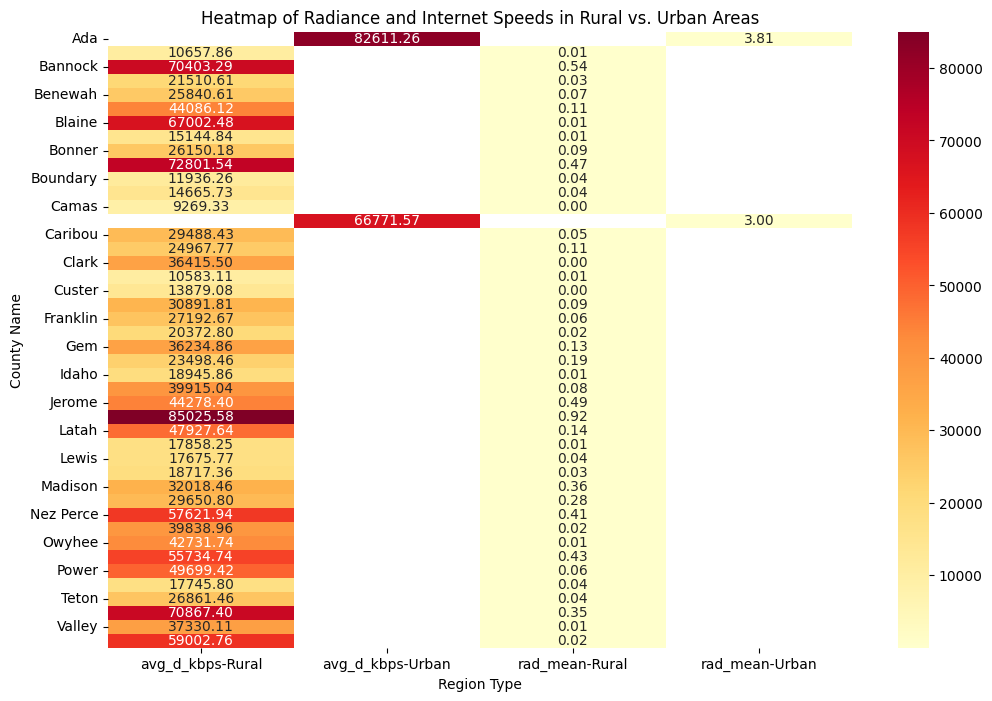

In [59]:
# Heatmap: Highlight rural areas with low radiance and poor internet speeds.

import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(idaho_df.pivot_table(index='County_Name', columns='Region_Type', values=['rad_mean', 'avg_d_kbps']), annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Heatmap of Radiance and Internet Speeds in Rural vs. Urban Areas')
plt.xlabel('Region Type')
plt.ylabel('County Name')
plt.show()

---
# 3- Comparison of Internet Performance between Rural and Urban Areas

In [41]:
# Check the unique values in the 'Region_Type' column
print(idaho_df['Region_Type'].unique())

# Remove rows with missing values in the relevant columns
cleaned_data = idaho_df.dropna(subset=['Region_Type', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms'])

# Optional: Check the distribution of 'Region_Type' to ensure 'Rural' and 'Urban' are present
print(cleaned_data['Region_Type'].value_counts())


['Urban' 'Rural']
Region_Type
Rural    7790
Urban    3187
Name: count, dtype: int64


In [42]:
#  Descriptive Statistics for Internet Performance Metrics by Region

# Grouping data by Region_Type (Rural vs Urban) and calculating mean and std
descriptive_stats = cleaned_data.groupby('Region_Type')[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms']].agg(['mean', 'std'])

descriptive_stats = descriptive_stats.round(2)

# Apply styling to the descriptive statistics table
styled_stats = descriptive_stats.style \
    .set_table_styles([{'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},  # Header Styling
                       {'selector': 'tbody td', 'props': [('text-align', 'center'), ('font-size', '12pt')]},  # Cell Text Alignment
                       {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Row Styling for Alternating Rows
                       {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},  # Row Styling for Alternating Rows
                       {'selector': 'tbody td:hover', 'props': [('background-color', '#dbe9f1')]},  # Hover Effect
                       {'selector': 'thead th', 'props': [('font-weight', 'bold')]}])  # Bold Header Styling

styled_stats


In [43]:
# This helps in understanding whether faster download speeds are correlated with faster upload speeds, or lower latency.

# Correlation matrix for internet performance metrics
correlation_metrics = cleaned_data[['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms']].corr()

# Print the correlation matrix
print(correlation_metrics)


            avg_d_mbps  avg_u_mbps  avg_lat_ms
avg_d_mbps    1.000000    0.446107   -0.137173
avg_u_mbps    0.446107    1.000000   -0.111223
avg_lat_ms   -0.137173   -0.111223    1.000000


In [44]:
#Broadband Availability: Highlight the relationship between broadband availability and internet performance, especially in rural areas.

# : Calculate the average broadband availability for rural and urban regions
broadband_availability = cleaned_data.groupby('Region_Type')['BROADBAND AVAILABILITY PER FCC'].mean()

# Convert the Series to a DataFrame to use the 'style' attribute
broadband_availability_df = broadband_availability.to_frame()

#  Style the average broadband availability results
styled_broadband_availability = broadband_availability_df.style \
    .background_gradient(cmap='coolwarm', axis=None)  # Apply a color gradient to show broadband availability strength
styled_broadband_availability = styled_broadband_availability.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},  # Header Styling
    {'selector': 'tbody td', 'props': [('text-align', 'center'), ('font-size', '12pt')]},  # Cell Text Alignment
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Row Styling for Alternating Rows
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},  # Row Styling for Alternating Rows
    {'selector': 'tbody td:hover', 'props': [('background-color', '#dbe9f1')]},  # Hover Effect
    {'selector': 'thead th', 'props': [('font-weight', 'bold')]}  # Bold Header Styling
])

# Print the styled average broadband availability results
print("Average Broadband Availability by Region Type:\n")
styled_broadband_availability

correlation_broadband = cleaned_data[['BROADBAND AVAILABILITY PER FCC', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms']].corr()

# Step  Style the correlation matrix
styled_correlation_broadband = correlation_broadband.style \
    .background_gradient(cmap='coolwarm', axis=None)  # Applying a color gradient to show correlation strength
styled_correlation_broadband = styled_correlation_broadband.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},  # Header Styling
    {'selector': 'tbody td', 'props': [('text-align', 'center'), ('font-size', '12pt')]},  # Cell Text Alignment
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Row Styling for Alternating Rows
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},  # Row Styling for Alternating Rows
    {'selector': 'tbody td:hover', 'props': [('background-color', '#dbe9f1')]},  # Hover Effect
    {'selector': 'thead th', 'props': [('font-weight', 'bold')]}  # Bold Header Styling
])

# Set decimal precision using format
styled_correlation_broadband = styled_correlation_broadband.format("{:.2f}")

print("Correlation Between Broadband Availability and Internet Performance Metrics:\n")
styled_correlation_broadband


Average Broadband Availability by Region Type:

Correlation Between Broadband Availability and Internet Performance Metrics:



,BROADBAND AVAILABILITY PER FCC,avg_d_mbps,avg_u_mbps,avg_lat_ms
BROADBAND AVAILABILITY PER FCC,1.00,0.18,0.11,-0.06
avg_d_mbps,0.18,1.00,0.45,-0.14
avg_u_mbps,0.11,0.45,1.00,-0.11
avg_lat_ms,-0.06,-0.14,-0.11,1.00


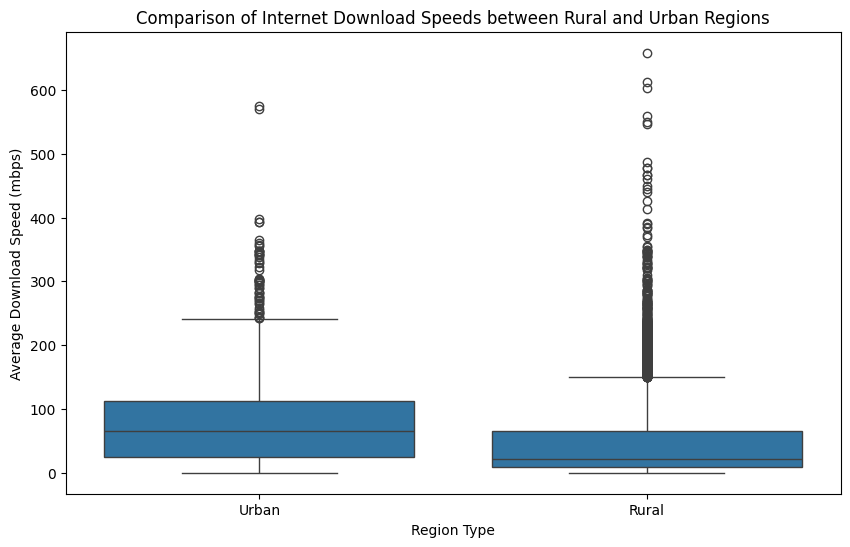

In [60]:
# Boxplot: Compare internet speeds between rural and urban regions.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region_Type', y='avg_d_mbps', data=idaho_df)  # Replace 'avg_d_mbps' with your download speed column
plt.title('Comparison of Internet Download Speeds between Rural and Urban Regions')
plt.xlabel('Region Type')
plt.ylabel('Average Download Speed (mbps)')
plt.show()

---
# 4- Population and Internet Metrics Relationship Analysis

In [45]:
#  Calculate descriptive statistics for internet metrics and population

population_internet_stats = idaho_df[['Population', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests']].describe()

#  Style the descriptive statistics output
styled_population_internet_stats = population_internet_stats.style \
    .set_table_styles([{'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},  # Header Styling
                       {'selector': 'tbody td', 'props': [('text-align', 'center'), ('font-size', '12pt')]},  # Cell Text Alignment
                       {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Row Styling for Alternating Rows
                       {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},  # Row Styling for Alternating Rows
                       {'selector': 'tbody td:hover', 'props': [('background-color', '#dbe9f1')]},  # Hover Effect
                       {'selector': 'thead th', 'props': [('font-weight', 'bold')]}])  # Bold Header Styling

#  Print the styled descriptive statistics
print("Descriptive Statistics for Population and Internet Performance Metrics:\n")
styled_population_internet_stats


Descriptive Statistics for Population and Internet Performance Metrics:



,Population,avg_d_mbps,avg_u_mbps,avg_lat_ms,tests
count,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000
mean,153707.695545,57.155643,15.442156,55.789651,8.638517
std,165187.637328,64.537250,30.533972,144.125344,15.113479
min,852.000000,0.017000,0.004000,1.000000,1.000000
25%,23864.000000,10.976000,2.570000,17.000000,1.000000
50%,86081.000000,30.851000,6.580000,25.000000,3.000000
75%,223499.000000,86.042000,13.604000,40.000000,9.000000
max,469966.000000,658.488000,446.544000,4232.000000,459.000000


In [46]:
#  Calculate correlations between Population and Internet Performance Metrics
correlation_population_internet = idaho_df[['Population', 'avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'tests']].corr()

#  Style the correlation matrix
styled_correlation_population_internet = correlation_population_internet.style \
    .background_gradient(cmap='coolwarm', axis=None)  # Applying a color gradient to show correlation strength
styled_correlation_population_internet = styled_correlation_population_internet.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},  # Header Styling
    {'selector': 'tbody td', 'props': [('text-align', 'center'), ('font-size', '12pt')]},  # Cell Text Alignment
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Row Styling for Alternating Rows
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},  # Row Styling for Alternating Rows
    {'selector': 'tbody td:hover', 'props': [('background-color', '#dbe9f1')]},  # Hover Effect
    {'selector': 'thead th', 'props': [('font-weight', 'bold')]}  # Bold Header Styling
])

styled_correlation_population_internet = styled_correlation_population_internet.format("{:.2f}")

# : Print the styled correlation matrix
print("Correlation between Population and Internet Performance Metrics:\n")
styled_correlation_population_internet


Correlation between Population and Internet Performance Metrics:



,Population,avg_d_mbps,avg_u_mbps,avg_lat_ms,tests
Population,1.00,0.27,0.21,-0.11,0.22
avg_d_mbps,0.27,1.00,0.45,-0.14,0.17
avg_u_mbps,0.21,0.45,1.00,-0.11,0.15
avg_lat_ms,-0.11,-0.14,-0.11,1.00,-0.06
tests,0.22,0.17,0.15,-0.06,1.00


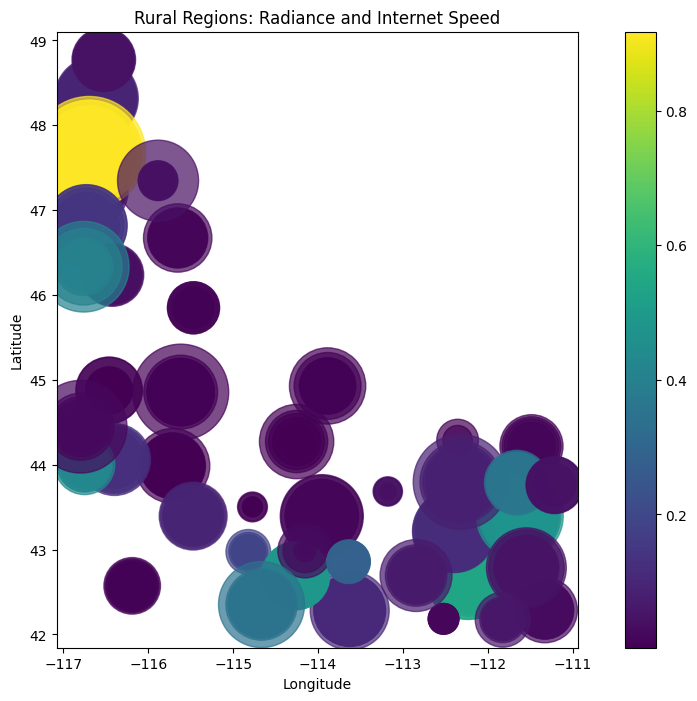

In [69]:
# prompt: Geospatial Overlay: Map rural regions with combined radiance and internet speed metrics.


import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame
#idaho_gdf = gpd.GeoDataFrame(idaho_df, geometry=gpd.points_from_xy(idaho_df.Longitude, idaho_df.Latitude))
# The idaho_df DataFrame likely does not contain the 'Longitude' and 'Latitude' columns, causing the error.
# Instead, you need to create the geometry column using the 'INTPTLON' and 'INTPTLAT' columns,
# which represent the longitude and latitude, respectively.

idaho_gdf = gpd.GeoDataFrame(idaho_df, geometry=gpd.points_from_xy(idaho_df.INTPTLON, idaho_df.INTPTLAT))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot rural regions with combined radiance and internet speed metrics
# Example: Color points based on 'rad_mean' and size based on 'avg_d_kbps'
idaho_gdf[idaho_gdf['Region_Type'] == 'Rural'].plot(column='rad_mean',
                                                    cmap='viridis',
                                                    markersize=idaho_gdf['avg_d_kbps'] / 100,  # Adjust scaling as needed
                                                    alpha=0.7,
                                                    ax=ax,
                                                    legend=True)


# Customize the plot
plt.title('Rural Regions: Radiance and Internet Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar (optional)
#plt.colorbar(label='Average Radiance')

# Show the plot
plt.show()

# **Hypothesis Testing**

**- Null Hypothesis**

In [70]:
# Null Hypothesis: There is no significant relationship between radiance and internet performance in rural areas.

# Perform t-test to compare internet performance between rural and urban areas
from scipy.stats import ttest_ind

# Assuming 'avg_d_mbps' represents download speed
rural_download_speeds = rural_df['avg_d_mbps']
urban_download_speeds = idaho_df[idaho_df['Region_Type'] == 'Urban']['avg_d_mbps']

t_statistic, p_value = ttest_ind(rural_download_speeds, urban_download_speeds)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in download speeds between rural and urban areas.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in download speeds between rural and urban areas.")

T-statistic: -20.927859148811855
P-value: 2.1489780605095328e-95
Reject the null hypothesis. There is a statistically significant difference in download speeds between rural and urban areas.


**- Alternative Hypothesis**

In [71]:
# Alternative Hypothesis: Radiance and internet performance are significantly related in rural areas.


from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(rural_df['rad_mean'], rural_df['avg_d_mbps'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant relationship between radiance and internet download speed in rural areas.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant relationship between radiance and internet download speed in rural areas.")

Pearson correlation coefficient: 0.3155361198650521
P-value: 1.2527282831362542e-179
Reject the null hypothesis. There is a statistically significant relationship between radiance and internet download speed in rural areas.


# **Prediction Mode**

In [72]:
# Predict internet performance in rural areas based on radiance levels.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for prediction
X = rural_df[['rad_mean']]  # Features (radiance)
y = rural_df['avg_d_mbps']  # Target (download speed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction: Predict download speed for a new radiance value
new_radiance = 0.5  # Example radiance value
predicted_download_speed = model.predict([[new_radiance]])
print(f"Predicted download speed for radiance {new_radiance}: {predicted_download_speed[0]}")

Mean Squared Error: 3556.047820274741
R-squared: 0.09701585549354075
Predicted download speed for radiance 0.5: 61.600597431370744
